#AI-LAB-5




###Dataset Input:

I added the load_data function, which checks if a file path is provided. If a CSV file is provided, it loads the data from that file. If no file is provided, it generates a synthetic dataset using the make_regression function from sklearn.datasets. This function generates regression data with noise, which makes the problem more complex and realistic.
More Complex Data:

If you use the synthetic data generation (make_regression), it will produce a more complex dataset with random noise. This can be useful to simulate real-world data where there is inherent variability that simple linear regression might not capture.
If you load your own dataset, ensure that the last column is the target variable and the others are features.
Polynomial Features:

I used PolynomialFeatures from sklearn.preprocessing to generate second-degree (quadratic) polynomial features from the original dataset. You can increase the degree parameter for a higher-degree polynomial.
Residual Plot:

The residual plots for both models (linear and polynomial) help to understand the error distribution and whether the polynomial model performs better at fitting the data.
###How to Use the Code:
Use a CSV File:
If you have a CSV file, simply pass its file path to the load_data function. Example:
X, y = load_data('your_data.csv')
Synthetic Data Generation (Default):
If you don’t provide a CSV file path, the code will generate synthetic data using make_regression. This can be useful for testing the polynomial regression with noisy data.

###Customization:
You can adjust the degree of the polynomial (currently set to 2) in the PolynomialFeatures(degree=2) line to test higher-degree polynomials.

###Visualizations:
Polynomial vs Linear Regression Plot: Shows the comparison between the simple linear regression line and the polynomial regression curve.
Residual Plot: Helps visualize the errors in both models, where you expect more random scatter for a good fit.

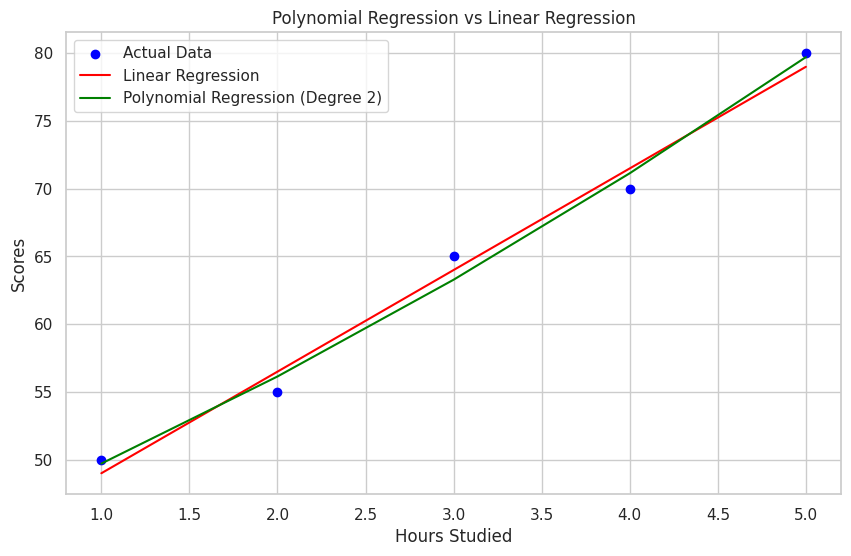

Linear Regression Performance:
R²: 0.9868, MSE: 1.5000

Polynomial Regression Performance:
R²: 0.9900, MSE: 1.1429


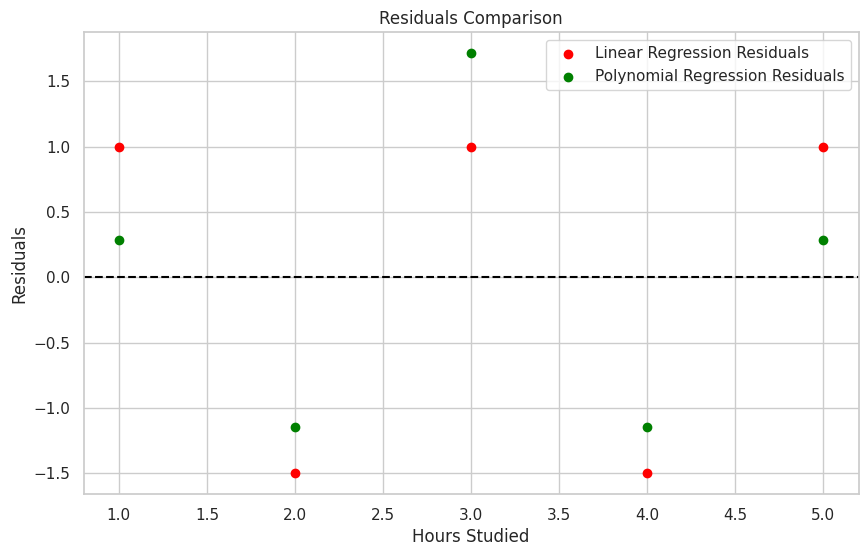

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Data Setup
# Example data: Hours Studied vs Scores
hours_studied = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
scores = np.array([50, 55, 65, 70, 80]).reshape(-1, 1)

# Step 2: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(hours_studied, scores)
linear_predictions = linear_reg.predict(hours_studied)

# Step 3: Polynomial Regression (Degree 2)
poly_features = PolynomialFeatures(degree=2)
hours_squared = poly_features.fit_transform(hours_studied)

poly_reg = LinearRegression()
poly_reg.fit(hours_squared, scores)
poly_predictions = poly_reg.predict(hours_squared)

# Step 4: Visualize the Data and Models
plt.figure(figsize=(10, 6))

# Scatter plot of original data
plt.scatter(hours_studied, scores, color='blue', label='Actual Data')

# Plot Linear Regression Line
plt.plot(hours_studied, linear_predictions, color='red', label='Linear Regression')

# Plot Polynomial Regression Curve
plt.plot(hours_studied, poly_predictions, color='green', label='Polynomial Regression (Degree 2)')

plt.title('Polynomial Regression vs Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Residuals and Model Performance
# Calculate residuals
linear_residuals = scores - linear_predictions
poly_residuals = scores - poly_predictions

# Calculate R-squared and Mean Squared Error (MSE)
linear_r2 = r2_score(scores, linear_predictions)
poly_r2 = r2_score(scores, poly_predictions)
linear_mse = mean_squared_error(scores, linear_predictions)
poly_mse = mean_squared_error(scores, poly_predictions)

print("Linear Regression Performance:")
print(f"R²: {linear_r2:.4f}, MSE: {linear_mse:.4f}")
print("\nPolynomial Regression Performance:")
print(f"R²: {poly_r2:.4f}, MSE: {poly_mse:.4f}")

# Step 6: Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(hours_studied, linear_residuals, color='red', label='Linear Regression Residuals')
plt.scatter(hours_studied, poly_residuals, color='green', label='Polynomial Regression Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals Comparison')
plt.xlabel('Hours Studied')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()
